In [1]:
import os
from dotenv import load_dotenv

import numpy as np
import itertools

import matplotlib.pyplot as plt

import json

import googlemaps
import gmaps

from utils.google_maps import GoogleMaps
from utils.graph import Graph
from utils import utils

# Get Google API key from:
# https://developers.google.com/maps/documentation/distance-matrix/start#get-a-key
load_dotenv('.env')

password = os.getenv('API_KEY')
gmaps.configure(password)

%load_ext autoreload
%autoreload 2

In [14]:
# Places of interest
places = 'Clérigos Church', 'Livraria Lello', 'Bolhão Market', 'Porto Cathedral', 'Dom Luis I Bridge', 'Avenida dos Aliados', 'Ribeira District', 'Café Majestic', 'Chapel of Souls', 'Church of São Francisco', 'Porto City Hall'

# Location
Location = 'Porto'

# Mode
Mode = 'walking'  # 'driving', 'walking', 'bicycling', 'transit'

In [15]:
# Get lat and lng
lat = []
lng = []

google_maps = GoogleMaps(password)
for place in places:
    print(place)
    result = google_maps.get_address_recommendation(query=place, language='en', location=Location)
    lat = np.append(lat, result[0]['lat'])
    lng = np.append(lng, result[0]['lng'])

lat = lat.astype(float)
lng = lng.astype(float)

lat, lng

Clérigos Church
Livraria Lello
Bolhão Market
Porto Cathedral
Dom Luis I Bridge
Avenida dos Aliados
Ribeira District
Café Majestic
Chapel of Souls
Church of São Francisco
Porto City Hall


(array([41.145854 , 41.1469055, 41.1493399, 41.1428531, 41.1399589,
        41.1483096, 41.1432682, 41.1472382, 41.1498821, 41.1410111,
        41.1499339]),
 array([-8.6137594, -8.6147746, -8.6071564, -8.6111165, -8.6094485,
        -8.6108148, -8.6103135, -8.6065795, -8.6056554, -8.6157173,
        -8.6107117]))

In [16]:
gmaps = googlemaps.Client(key=password)

dist_matrix = []

for i in range(len(places)):
    for j in range(len(places)):
        x = (lat[i], lng[i])
        y = (lat[j], lng[j])
        directions_result = gmaps.directions(x, y, mode=Mode, avoid='ferries',)
        dist_matrix.append(directions_result[0]['legs'][0]['distance']['value'])

dist_matrix = np.reshape(dist_matrix, (len(places), len(places)))
dist_matrix.astype(int)
dist_matrix

array([[   0,  384,  747,  513,  942,  462,  566,  690,  961,  751,  647],
       [ 384,    0,  856,  909, 1196,  466,  820,  799, 1070, 1095,  596],
       [ 747,  856,    0,  892, 1179,  410,  803,  338,  214, 1227,  412],
       [ 655,  908,  892,    0,  460,  691,   89,  677,  981,  613,  903],
       [ 942, 1195, 1179,  460,    0,  978,  376,  951, 1255,  676, 1190],
       [ 462,  466,  410,  691,  978,    0,  602,  435,  650, 1026,  210],
       [ 566,  819,  803,   89,  376,  602,    0,  588,  892,  627,  814],
       [ 690,  799,  338,  677,  964,  435,  588,    0,  304, 1170,  596],
       [ 986, 1117,  394,  981, 1268,  650,  892,  304,    0, 1466,  652],
       [ 751, 1095, 1239,  613,  676, 1038,  627, 1182, 1453,    0, 1217],
       [ 647,  596,  412,  903, 1190,  210,  814,  596,  591, 1238,    0]])

In [17]:
# Convert dist_matrix to a symmetrical matrix
dist_matrix = np.asmatrix(dist_matrix)

for i in range(0, len(places), 1):
    for j in range(i+1, len(places), 1):
        dist_matrix[j,i] = dist_matrix[i,j]
dist_matrix = np.asarray(dist_matrix)
dist_matrix

array([[   0,  384,  747,  513,  942,  462,  566,  690,  961,  751,  647],
       [ 384,    0,  856,  909, 1196,  466,  820,  799, 1070, 1095,  596],
       [ 747,  856,    0,  892, 1179,  410,  803,  338,  214, 1227,  412],
       [ 513,  909,  892,    0,  460,  691,   89,  677,  981,  613,  903],
       [ 942, 1196, 1179,  460,    0,  978,  376,  951, 1255,  676, 1190],
       [ 462,  466,  410,  691,  978,    0,  602,  435,  650, 1026,  210],
       [ 566,  820,  803,   89,  376,  602,    0,  588,  892,  627,  814],
       [ 690,  799,  338,  677,  951,  435,  588,    0,  304, 1170,  596],
       [ 961, 1070,  214,  981, 1255,  650,  892,  304,    0, 1466,  652],
       [ 751, 1095, 1227,  613,  676, 1026,  627, 1170, 1466,    0, 1217],
       [ 647,  596,  412,  903, 1190,  210,  814,  596,  652, 1217,    0]])

In [18]:
source_node = 0
debug = True
debug_folder = r'output/1/'

if not os.path.exists(debug_folder):
    os.makedirs(debug_folder)
else:
    print("Output directory already exists")
    exit(1)

Output directory already exists


Initial graph
Edge: (0, 1) = 384
Edge: (0, 2) = 747
Edge: (0, 3) = 513
Edge: (0, 4) = 942
Edge: (0, 5) = 462
Edge: (0, 6) = 566
Edge: (0, 7) = 690
Edge: (0, 8) = 961
Edge: (0, 9) = 751
Edge: (0, 10) = 647
Edge: (1, 2) = 856
Edge: (1, 3) = 909
Edge: (1, 4) = 1196
Edge: (1, 5) = 466
Edge: (1, 6) = 820
Edge: (1, 7) = 799
Edge: (1, 8) = 1070
Edge: (1, 9) = 1095
Edge: (1, 10) = 596
Edge: (2, 3) = 892
Edge: (2, 4) = 1179
Edge: (2, 5) = 410
Edge: (2, 6) = 803
Edge: (2, 7) = 338
Edge: (2, 8) = 214
Edge: (2, 9) = 1227
Edge: (2, 10) = 412
Edge: (3, 4) = 460
Edge: (3, 5) = 691
Edge: (3, 6) = 89
Edge: (3, 7) = 677
Edge: (3, 8) = 981
Edge: (3, 9) = 613
Edge: (3, 10) = 903
Edge: (4, 5) = 978
Edge: (4, 6) = 376
Edge: (4, 7) = 951
Edge: (4, 8) = 1255
Edge: (4, 9) = 676
Edge: (4, 10) = 1190
Edge: (5, 6) = 602
Edge: (5, 7) = 435
Edge: (5, 8) = 650
Edge: (5, 9) = 1026
Edge: (5, 10) = 210
Edge: (6, 7) = 588
Edge: (6, 8) = 892
Edge: (6, 9) = 627
Edge: (6, 10) = 814
Edge: (7, 8) = 304
Edge: (7, 9) = 1170
Ed

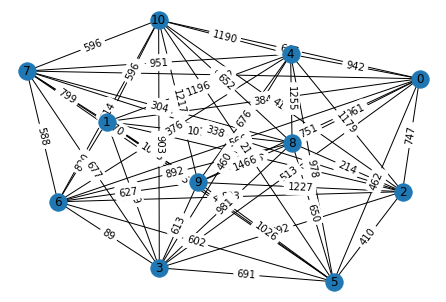

In [19]:
# Create graph from distance matrix
initial_g = utils.from_numpy_matrix(dist_matrix)

if debug:
    print("Initial graph")
    utils.print_edges_with_weight(initial_g)
    initial_g.plot_graph(os.path.join(debug_folder, 'graph.png'))


MST
Edge: (3, 6) = 89
Edge: (3, 0) = 513
Edge: (3, 9) = 613
Edge: (6, 4) = 376
Edge: (5, 10) = 210
Edge: (5, 2) = 410
Edge: (5, 0) = 462
Edge: (2, 8) = 214
Edge: (8, 7) = 304
Edge: (0, 1) = 384


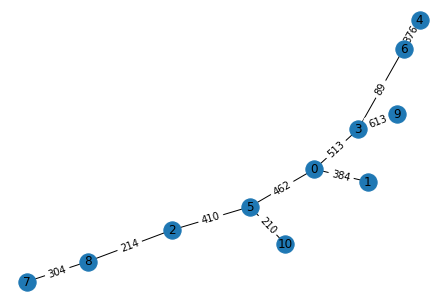

In [20]:
# Create MST
mst_graph = utils.get_mst(initial_g)
if debug:
    print('\nMST')
    utils.print_edges_with_weight(mst_graph)
    mst_graph.plot_graph(os.path.join(debug_folder, 'mst.png'))

In [21]:
mst_degrees = utils.get_degrees(mst_graph)
if debug:
    print(f"\nMST degree: {mst_degrees}")

odd_degrees = utils.get_nodes_odd_degrees(mst_degrees)
if debug:
    print(f"\nMST odd degree: {odd_degrees}")


MST degree: {3: 3, 6: 2, 5: 3, 10: 1, 2: 2, 8: 2, 7: 1, 4: 1, 0: 3, 1: 1, 9: 1}

MST odd degree: {3: 3, 5: 3, 10: 1, 7: 1, 4: 1, 0: 3, 1: 1, 9: 1}



Subgraph:
Edge: (0, 1) = 384
Edge: (0, 3) = 513
Edge: (0, 4) = 942
Edge: (0, 5) = 462
Edge: (0, 7) = 690
Edge: (0, 9) = 751
Edge: (0, 10) = 647
Edge: (1, 3) = 909
Edge: (1, 4) = 1196
Edge: (1, 5) = 466
Edge: (1, 7) = 799
Edge: (1, 9) = 1095
Edge: (1, 10) = 596
Edge: (3, 4) = 460
Edge: (3, 5) = 691
Edge: (3, 7) = 677
Edge: (3, 9) = 613
Edge: (3, 10) = 903
Edge: (4, 5) = 978
Edge: (4, 7) = 951
Edge: (4, 9) = 676
Edge: (4, 10) = 1190
Edge: (5, 7) = 435
Edge: (5, 9) = 1026
Edge: (5, 10) = 210
Edge: (7, 9) = 1170
Edge: (7, 10) = 596
Edge: (9, 10) = 1217


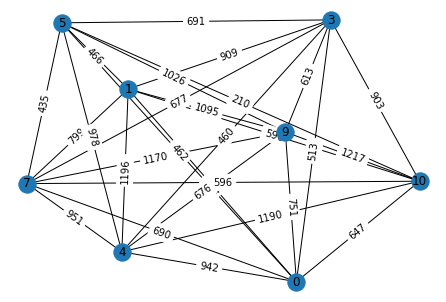

In [22]:
subgraph = utils.create_subgraph(initial_g, odd_degrees)
if debug:
    print("\nSubgraph:")
    utils.print_edges_with_weight(subgraph)
    subgraph.plot_graph(os.path.join(debug_folder, 'subgraph.png'))


Minimum weight perfect match:
Edge: (0, 1) = 384
Edge: (3, 7) = 677
Edge: (10, 5) = 210
Edge: (9, 4) = 676


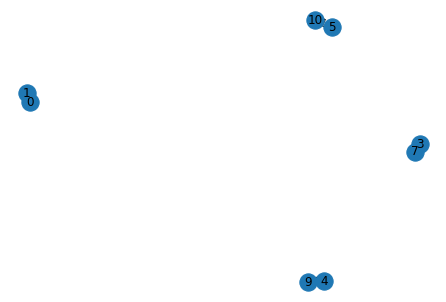

In [23]:
minimum_perfect_match = utils.create_minimum_weight_perfect_matching(subgraph)
if debug:
    print("\nMinimum weight perfect match:")
    utils.print_edges_with_weight(minimum_perfect_match)
    minimum_perfect_match.plot_graph(os.path.join(debug_folder, 'minimum_perfect_match.png'))


Union graph details:
Edge: (3, 6)
Edge: (3, 0)
Edge: (3, 9)
Edge: (3, 7)
Edge: (6, 4)
Edge: (0, 5)
Edge: (0, 1)
Edge: (0, 1)
Edge: (9, 4)
Edge: (5, 10)
Edge: (5, 10)
Edge: (5, 2)
Edge: (2, 8)
Edge: (8, 7)


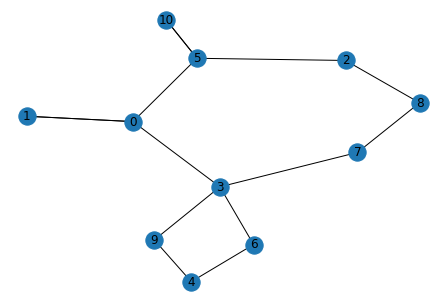

In [24]:
union_graph = utils.union_graphs(mst_graph, minimum_perfect_match)
if debug:
    print("\nUnion graph details:")
    utils.print_edges_with_weight(union_graph)
    union_graph.plot_graph(os.path.join(debug_folder, 'union_graph.png'))


 Euler tour: [(0, 1), (1, 0), (0, 5), (5, 10), (10, 5), (5, 2), (2, 8), (8, 7), (7, 3), (3, 9), (9, 4), (4, 6), (6, 3), (3, 0)]


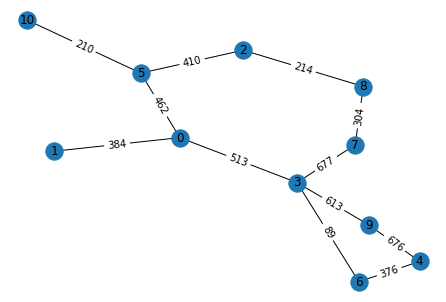

In [25]:
euler_tour_itr = union_graph.get_euler_tour(source_node)

euler_tour = []
for e in euler_tour_itr:
    euler_tour.append(e)

if debug:
    print(f"\n Euler tour: {euler_tour}")
    euler_g = Graph()
    for e in euler_tour:
        euler_g.add_edge(e[0], e[1], initial_g.get_edge_weight(e[0], e[1]))
    euler_g.plot_graph(os.path.join(debug_folder, 'euler_tour.png'))


Path: [0, 1, 5, 10, 2, 8, 7, 3, 9, 4, 6, 0]
Total traveling cost: 4898


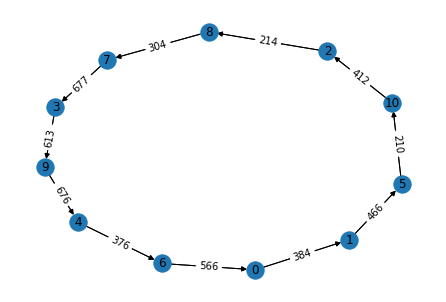

In [26]:
euler_tour = list(itertools.chain.from_iterable(list(euler_tour)))
euler_tour = list(dict.fromkeys(euler_tour).keys())
euler_tour.append(source_node)
print(f"\nPath: {euler_tour}")

if debug:
    final_path = Graph(di_graph=True)
    for i in range(len(euler_tour) - 1):
        final_path.add_edge(euler_tour[i], 
                            euler_tour[i + 1], 
                            initial_g.get_edge_weight(euler_tour[i], euler_tour[i + 1]))
    
    final_path.plot_graph(os.path.join(debug_folder, 'output.png'))

total_weight = utils.get_total_cost(initial_g, euler_tour)
print(f"Total traveling cost: {total_weight}")

In [27]:
ord_places = []
for i in range(len(places)):
    ord_places.append(places[euler_tour[i]])

In [28]:
print('legend: \n')
for i in range(len(ord_places)):
    print(i, ' = ', ord_places[i])

legend: 

0  =  Clérigos Church
1  =  Livraria Lello
2  =  Avenida dos Aliados
3  =  Porto City Hall
4  =  Bolhão Market
5  =  Chapel of Souls
6  =  Café Majestic
7  =  Porto Cathedral
8  =  Church of São Francisco
9  =  Dom Luis I Bridge
10  =  Ribeira District


In [29]:
# Sort lat and lng according to tour
new_lat = []
new_lng = []
idx = []

for i in euler_tour[:]:
    new_lat = np.append(new_lat, lat[i])
    new_lng = np.append(new_lng, lng[i])
    idx.append(i)

new_lat, new_lng

(array([41.145854 , 41.1469055, 41.1483096, 41.1499339, 41.1493399,
        41.1498821, 41.1472382, 41.1428531, 41.1410111, 41.1399589,
        41.1432682, 41.145854 ]),
 array([-8.6137594, -8.6147746, -8.6108148, -8.6107117, -8.6071564,
        -8.6056554, -8.6065795, -8.6111165, -8.6157173, -8.6094485,
        -8.6103135, -8.6137594]))

In [30]:
# draw lines and points (option)

import gmaps
gmaps.configure(api_key=password)

center = (np.mean(new_lat).astype(float), np.mean(new_lng).astype(float))
poi_locations = list(zip(new_lat, new_lng))

# fix too many tool box
fig = gmaps.figure(center=center, zoom_level=13)


fig.add_layer(gmaps.drawing_layer(features=[
    gmaps.Marker((new_lat[i], new_lng[i]), label='%s' % (i)) for i in range(len(ord_places))  
]))

fig.add_layer(gmaps.drawing_layer(features=[
    gmaps.Line((new_lat[i], new_lng[i]), 
               (new_lat[i + 1], new_lng[i + 1]), 
               stroke_weight=3.0) for i in range(len(ord_places))
]))   

fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
print('legend: \n')
for i in range(len(ord_places)):
    print(i, ' = ', ord_places[i])

legend: 

0  =  Clérigos Church
1  =  Livraria Lello
2  =  Avenida dos Aliados
3  =  Porto City Hall
4  =  Bolhão Market
5  =  Chapel of Souls
6  =  Café Majestic
7  =  Porto Cathedral
8  =  Church of São Francisco
9  =  Dom Luis I Bridge
10  =  Ribeira District


In [32]:
# Draw real route

import gmaps
gmaps.configure(api_key=password)

fig = gmaps.figure(center=center, zoom_level=13)

fig.add_layer(gmaps.drawing_layer(features=[
    gmaps.Marker((new_lat[i], new_lng[i]), label='%s' % (i)) for i in range(len(places))  
]))

for i in range(len(places)):
    fig.add_layer(
        gmaps.directions.Directions((new_lat[i], new_lng[i]), (new_lat[i+1], new_lng[i+1]), mode='WALKING', show_markers=False)
    )

fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
print('legend: \n')
for i in range(len(ord_places)):
    print(i, ' = ', ord_places[i])

legend: 

0  =  Clérigos Church
1  =  Livraria Lello
2  =  Avenida dos Aliados
3  =  Porto City Hall
4  =  Bolhão Market
5  =  Chapel of Souls
6  =  Café Majestic
7  =  Porto Cathedral
8  =  Church of São Francisco
9  =  Dom Luis I Bridge
10  =  Ribeira District
